In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist.train.num_examples

55000

In [6]:
print("No. of images in training set {}".format(mnist.train.images.shape))
print("No. of labels in training set {}".format(mnist.train.labels.shape))
print("No. of images in test set {}".format(mnist.test.images.shape))
print("No. of labels in test set {}".format(mnist.test.labels.shape))


No. of images in training set (55000, 784)
No. of labels in training set (55000, 10)
No. of images in test set (10000, 784)
No. of labels in test set (10000, 10)


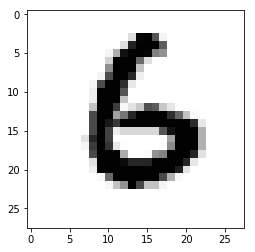

In [7]:
img1 = mnist.train.images[40].reshape(28,28)
plt.imshow(img1, cmap='Greys')

In [8]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [9]:
learning_rate = 0.1
epochs = 10
batch_size = 100


In [10]:
#weights and bias of input to hidden layer
w_xh = tf.Variable(tf.random_normal([784,300], stddev=0.03), name='w_xh')
b_h = tf.Variable(tf.random_normal([300], name='b_h'))

In [11]:
#weights and bias of hidden to output layer
w_hy = tf.Variable(tf.random_normal([300,10], stddev=0.03), name='w_yh')
b_y = tf.Variable(tf.random_normal([10], name='b_y'))

In [12]:
#Feed forward
z1 = tf.add(tf.matmul(x, w_xh), b_h)
a1 = tf.nn.relu(z1)
z2 = tf.add(tf.matmul(a1, w_hy), b_y)
yhat = tf.nn.softmax(z2)

In [13]:
#defining loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(yhat), reduction_indices=[1]))

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

In [15]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(yhat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
cross_entropy

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [16]:
init_op = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels)/batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size = batch_size)
            _, c = sess.run([optimizer, cross_entropy], feed_dict={x: batch_x, y: batch_y})
            print("Cost",c)
            avg_cost += c/total_batch
        print("Epoch: ", (epoch + 1), "cost = ""{:.3f}".format(avg_cost))
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Cost 2.6171098
Cost 2.6694524
Cost 2.7942135
Cost 2.474734
Cost 2.386397
Cost 2.3099902
Cost 2.2971983
Cost 2.2861261
Cost 2.255307
Cost 2.2766929
Cost 2.2705789
Cost 2.0837777
Cost 2.0630174
Cost 2.1314034
Cost 2.081301
Cost 2.0194323
Cost 1.9720583
Cost 1.9226326
Cost 2.0048752
Cost 1.812397
Cost 1.767382
Cost 1.753255
Cost 1.8407812
Cost 1.6447371
Cost 1.5757418
Cost 1.5556034
Cost 1.4688954
Cost 1.4690915
Cost 1.4625796
Cost 1.4919375
Cost 1.3880228
Cost 1.2756054
Cost 1.2592205
Cost 1.4059819
Cost 1.2965449
Cost 1.2302101
Cost 1.2300558
Cost 1.1245434
Cost 1.204926
Cost 1.1172982
Cost 1.0847718
Cost 1.2017305
Cost 1.1449897
Cost 1.1956322
Cost 1.0825711
Cost 1.0872567
Cost 1.0049546
Cost 0.99363536
Cost 0.8976898
Cost 1.0151215
Cost 0.93037796
Cost 0.9657514
Cost 0.8990484
Cost 0.9675788
Cost 1.0155448
Cost 0.9491626
Cost 0.77063894
Cost 0.975711
Cost 0.8338137
Cost 0.82094246
Cost 0.82784826
Cost 0.8377419
Cost 0.9395629
Cost 0.82517016
Cost 0.9090321
Cost 0.78404754
Cost 0.77922

Cost 0.35971275
Cost 0.3190753
Cost 0.27859962
Cost 0.25613782
Cost 0.24486345
Cost 0.24323581
Cost 0.25232342
Cost 0.22612073
Cost 0.30557382
Cost 0.30390182
Cost 0.41949412
Cost 0.26556432
Cost 0.3187083
Cost 0.20025776
Cost 0.30942133
Epoch:  1 cost = 297.117
Cost 0.19406265
Cost 0.301037
Cost 0.28610864
Cost 0.29699382
Cost 0.32647046
Cost 0.22675496
Cost 0.3148455
Cost 0.3328938
Cost 0.30447078
Cost 0.23832941
Cost 0.25761145
Cost 0.4273259
Cost 0.38232616
Cost 0.1765741
Cost 0.27940586
Cost 0.35456792
Cost 0.30388832
Cost 0.3129033
Cost 0.35076317
Cost 0.48129448
Cost 0.34986928
Cost 0.37049937
Cost 0.44740826
Cost 0.21902508
Cost 0.2739993
Cost 0.30670607
Cost 0.21861085
Cost 0.29868734
Cost 0.20257032
Cost 0.247181
Cost 0.24169342
Cost 0.29999697
Cost 0.29659143
Cost 0.3620236
Cost 0.21129186
Cost 0.40702033
Cost 0.31308866
Cost 0.23484808
Cost 0.3266133
Cost 0.25451308
Cost 0.37204766
Cost 0.38159353
Cost 0.35244346
Cost 0.33658358
Cost 0.29950202
Cost 0.35495782
Cost 0.353244

Cost 0.16810969
Cost 0.33120364
Cost 0.34635743
Cost 0.15901227
Cost 0.26003474
Cost 0.39412624
Cost 0.13583146
Cost 0.2245097
Cost 0.25675008
Cost 0.28660282
Cost 0.32529885
Cost 0.31816941
Cost 0.3421815
Cost 0.28763607
Cost 0.39278835
Cost 0.207759
Cost 0.30785584
Cost 0.3118248
Cost 0.2985292
Cost 0.3553811
Cost 0.2999259
Cost 0.20759295
Cost 0.21047729
Cost 0.35548192
Cost 0.24700525
Cost 0.22310801
Cost 0.18734829
Cost 0.26239398
Cost 0.24152641
Cost 0.2024291
Cost 0.30132207
Cost 0.1803687
Cost 0.2353965
Epoch:  2 cost = 160.077
Cost 0.29060563
Cost 0.13823918
Cost 0.32586476
Cost 0.26296282
Cost 0.27503246
Cost 0.30501735
Cost 0.21842913
Cost 0.41878164
Cost 0.24616924
Cost 0.25247312
Cost 0.17793569
Cost 0.14203183
Cost 0.24600956
Cost 0.182404
Cost 0.32895595
Cost 0.17665827
Cost 0.33406314
Cost 0.31258777
Cost 0.21670313
Cost 0.13166536
Cost 0.34635276
Cost 0.2590626
Cost 0.27293655
Cost 0.34329918
Cost 0.2559143
Cost 0.1842864
Cost 0.14858013
Cost 0.14634463
Cost 0.2419257


Cost 0.24137905
Cost 0.14557612
Cost 0.4069452
Cost 0.19284849
Cost 0.21186896
Cost 0.30824026
Cost 0.18401146
Cost 0.31428835
Cost 0.33506626
Cost 0.24832043
Cost 0.18768768
Cost 0.34823403
Cost 0.31544608
Cost 0.24433245
Cost 0.32289398
Cost 0.23131594
Cost 0.15708733
Cost 0.13440624
Cost 0.22033101
Cost 0.2125827
Cost 0.14471613
Cost 0.12618816
Cost 0.22595386
Cost 0.19481899
Cost 0.1713098
Cost 0.31742755
Cost 0.21886759
Cost 0.18634003
Cost 0.15959701
Cost 0.28722322
Cost 0.1856834
Cost 0.28908315
Cost 0.24618839
Cost 0.15124835
Cost 0.26891652
Cost 0.23069577
Cost 0.21397977
Cost 0.2349961
Cost 0.1865673
Cost 0.16357182
Cost 0.1908655
Cost 0.1451445
Cost 0.16766149
Cost 0.17103115
Cost 0.16827013
Cost 0.32119596
Cost 0.19091879
Cost 0.2859099
Cost 0.16510004
Epoch:  3 cost = 130.219
Cost 0.16861975
Cost 0.21247229
Cost 0.15936022
Cost 0.16190442
Cost 0.21989603
Cost 0.2533595
Cost 0.22936362
Cost 0.3190898
Cost 0.29610553
Cost 0.2107824
Cost 0.20373659
Cost 0.23190002
Cost 0.1286

Cost 0.1443701
Cost 0.06279167
Cost 0.176113
Cost 0.30862063
Cost 0.09545929
Cost 0.22578308
Cost 0.19454642
Cost 0.2244336
Cost 0.09892953
Cost 0.19879356
Cost 0.12142808
Cost 0.21700376
Cost 0.11147657
Cost 0.18319754
Cost 0.09139295
Cost 0.18813127
Cost 0.29310086
Cost 0.15885061
Cost 0.19009487
Cost 0.12762906
Cost 0.20540597
Cost 0.3005685
Cost 0.11083561
Cost 0.24072744
Cost 0.23765162
Cost 0.22776203
Cost 0.29989332
Cost 0.16307302
Cost 0.19216539
Cost 0.2316618
Cost 0.23727964
Cost 0.0680701
Cost 0.21790408
Cost 0.1234808
Cost 0.15186398
Cost 0.2714154
Cost 0.15813985
Cost 0.18045503
Cost 0.19616911
Cost 0.089534566
Cost 0.10764108
Cost 0.23246147
Cost 0.19536902
Cost 0.18789195
Cost 0.3008958
Cost 0.0708856
Epoch:  4 cost = 107.729
Cost 0.16681235
Cost 0.21871582
Cost 0.113208205
Cost 0.10982462
Cost 0.18060595
Cost 0.23607713
Cost 0.13397512
Cost 0.16451848
Cost 0.30698603
Cost 0.04537639
Cost 0.22200103
Cost 0.30447066
Cost 0.09950632
Cost 0.2238639
Cost 0.09774378
Cost 0.14

Cost 0.1703003
Cost 0.14872965
Cost 0.10608826
Cost 0.13922536
Cost 0.2366243
Cost 0.17923823
Cost 0.14026845
Cost 0.20672104
Cost 0.061028752
Cost 0.15488163
Cost 0.19548796
Cost 0.17198434
Cost 0.23726642
Cost 0.13263607
Cost 0.12942128
Cost 0.089301065
Cost 0.23161983
Cost 0.2024603
Cost 0.10202378
Cost 0.12990825
Cost 0.20573322
Cost 0.17954622
Cost 0.19430506
Cost 0.21337242
Cost 0.07749015
Cost 0.15743735
Cost 0.12117085
Cost 0.22917555
Cost 0.17120452
Cost 0.15530472
Cost 0.06623531
Cost 0.12829453
Cost 0.13735975
Cost 0.13289218
Cost 0.1957046
Cost 0.19452515
Cost 0.16419996
Cost 0.13240162
Cost 0.19757873
Cost 0.10803637
Cost 0.28618705
Cost 0.1702203
Cost 0.23150201
Cost 0.21704382
Cost 0.13478842
Cost 0.06764596
Cost 0.17628324
Cost 0.18299598
Cost 0.19921792
Cost 0.1400457
Cost 0.17914957
Cost 0.05595654
Epoch:  5 cost = 91.614
Cost 0.14052802
Cost 0.13908342
Cost 0.108503066
Cost 0.11405288
Cost 0.10313811
Cost 0.21533422
Cost 0.115564175
Cost 0.1578023
Cost 0.1439508
Cost

Cost 0.1219872
Cost 0.3209145
Cost 0.1144075
Cost 0.14505842
Cost 0.30111158
Cost 0.16173783
Cost 0.16848809
Cost 0.19287102
Cost 0.16884218
Cost 0.091103695
Cost 0.06924189
Cost 0.10548899
Cost 0.088346936
Cost 0.090714514
Cost 0.1447579
Cost 0.13316572
Cost 0.1461656
Cost 0.0650073
Cost 0.14291696
Cost 0.092154816
Cost 0.10578117
Cost 0.10325061
Cost 0.07937482
Cost 0.12872492
Cost 0.087959915
Cost 0.11003633
Cost 0.09667275
Cost 0.14920479
Cost 0.0881315
Cost 0.12989813
Cost 0.15350002
Cost 0.14605804
Cost 0.17010976
Cost 0.05958714
Cost 0.18271376
Cost 0.09732041
Cost 0.20426698
Cost 0.16519226
Cost 0.23750576
Cost 0.1117992
Cost 0.07939072
Cost 0.18922137
Cost 0.2561509
Cost 0.15169312
Cost 0.08730333
Cost 0.08461312
Cost 0.16502787
Cost 0.12827921
Cost 0.10609585
Cost 0.08567367
Cost 0.16647473
Cost 0.16443484
Cost 0.12102968
Cost 0.11332469
Cost 0.0501108
Cost 0.1448865
Cost 0.12256244
Cost 0.12995932
Cost 0.082760446
Cost 0.20210919
Cost 0.12751247
Epoch:  6 cost = 79.226
Cost 

Cost 0.079620875
Cost 0.060075805
Cost 0.19702509
Cost 0.08982162
Cost 0.049857996
Cost 0.13150159
Cost 0.120734215
Cost 0.07552235
Cost 0.16754341
Cost 0.045895036
Cost 0.09771368
Cost 0.06489262
Cost 0.13407813
Cost 0.09904057
Cost 0.1157173
Cost 0.15484825
Cost 0.06431067
Cost 0.06827809
Cost 0.19344904
Cost 0.12266651
Cost 0.18769586
Cost 0.12545906
Cost 0.16570467
Cost 0.04338861
Cost 0.21088055
Cost 0.09338932
Cost 0.20145012
Cost 0.08016814
Cost 0.2137374
Cost 0.09973295
Cost 0.12297202
Cost 0.2808483
Cost 0.17679098
Cost 0.11551304
Cost 0.19834833
Cost 0.102775976
Cost 0.11113258
Cost 0.05704394
Cost 0.18503407
Cost 0.20462337
Cost 0.13884561
Cost 0.098389454
Cost 0.23027106
Cost 0.08731523
Cost 0.11170111
Cost 0.14595327
Cost 0.08955308
Cost 0.058567666
Cost 0.14672339
Cost 0.08214219
Cost 0.07063506
Cost 0.04786142
Cost 0.04979594
Cost 0.08600061
Cost 0.06993632
Cost 0.078183934
Cost 0.08248312
Cost 0.06978393
Cost 0.05635199
Cost 0.122368954
Cost 0.12384973
Cost 0.07908443
C

Cost 0.12015888
Cost 0.115275055
Cost 0.12999894
Cost 0.0945746
Cost 0.3971099
Cost 0.13266261
Cost 0.19015852
Cost 0.074492455
Cost 0.06821023
Cost 0.058570303
Cost 0.18058701
Cost 0.11036131
Cost 0.08356554
Cost 0.23504381
Cost 0.13614647
Cost 0.05959168
Cost 0.052316178
Cost 0.06352393
Cost 0.095466964
Cost 0.118808955
Cost 0.10158413
Cost 0.06734604
Cost 0.10088376
Cost 0.067054994
Cost 0.1858146
Cost 0.12310319
Cost 0.048282176
Cost 0.17601013
Cost 0.06888498
Cost 0.13209917
Cost 0.09277242
Cost 0.060904607
Cost 0.06800872
Cost 0.16651574
Cost 0.067298315
Cost 0.077243574
Cost 0.11983061
Cost 0.072220206
Cost 0.19730036
Cost 0.08993715
Cost 0.06612189
Cost 0.15795277
Cost 0.16954441
Cost 0.08426592
Cost 0.0646961
Cost 0.12843595
Cost 0.11052506
Cost 0.08477976
Cost 0.070701435
Cost 0.08777691
Cost 0.12277058
Cost 0.12112121
Cost 0.1518345
Cost 0.0661664
Cost 0.09337537
Cost 0.22159494
Cost 0.084856145
Cost 0.122796685
Cost 0.0566943
Cost 0.039117154
Cost 0.11809808
Cost 0.11110797

Cost 0.030292716
Cost 0.051274907
Cost 0.1279593
Cost 0.1191612
Cost 0.035441626
Cost 0.09648387
Cost 0.08621345
Cost 0.07405975
Cost 0.08093913
Cost 0.13194853
Cost 0.043614507
Cost 0.08506492
Cost 0.07076804
Cost 0.10803765
Cost 0.17545053
Cost 0.18107715
Cost 0.14082298
Cost 0.12531647
Cost 0.15393132
Cost 0.064257085
Cost 0.073736176
Cost 0.07740447
Cost 0.057410903
Cost 0.1095233
Cost 0.1158815
Cost 0.14582832
Cost 0.06523758
Cost 0.08315631
Cost 0.058091253
Cost 0.16088481
Cost 0.11359716
Cost 0.09025496
Cost 0.07962759
Cost 0.19747466
Cost 0.14531918
Cost 0.08905792
Cost 0.07504907
Cost 0.06503706
Cost 0.036769472
Cost 0.11538908
Cost 0.08524275
Cost 0.03703827
Cost 0.15786503
Cost 0.0677163
Cost 0.075566605
Cost 0.11480774
Cost 0.10347793
Cost 0.10791609
Cost 0.051014744
Cost 0.12003487
Cost 0.12532787
Cost 0.11158442
Cost 0.12510057
Cost 0.100250654
Cost 0.10360712
Cost 0.12721705
Cost 0.18767841
Cost 0.09581446
Cost 0.13482188
Cost 0.054456104
Cost 0.202754
Cost 0.06253681
Co

Cost 0.0724353
Cost 0.14063363
Cost 0.11959928
Cost 0.03741297
Cost 0.089503735
Cost 0.10089204
Cost 0.1403232
Cost 0.047160894
Cost 0.10808334
Cost 0.16621819
Cost 0.16672343
Cost 0.08482066
Cost 0.08204669
Cost 0.076379985
Cost 0.072749354
Cost 0.0514011
Cost 0.05807333
Cost 0.14104696
Cost 0.112451866
Cost 0.08161952
Cost 0.092943475
Cost 0.092500165
Cost 0.08302598
Cost 0.1176879
Cost 0.11461758
Cost 0.07461958
Cost 0.12182949
Cost 0.08272019
Cost 0.104504064
Cost 0.042415094
Cost 0.1039037
Cost 0.03396834
Cost 0.20718382
Cost 0.099814154
Cost 0.100178435
Cost 0.06246297
Cost 0.09076327
Cost 0.06244266
Cost 0.08799058
Cost 0.13237645
Cost 0.15895721
Cost 0.06505642
Cost 0.09232593
Cost 0.1518231
Cost 0.073341586
Cost 0.08530474
Cost 0.067720436
Cost 0.15150948
Cost 0.08359547
Cost 0.03669767
Cost 0.045297418
Cost 0.021954391
Cost 0.07396854
Cost 0.09903565
Cost 0.061141163
Cost 0.049855884
Cost 0.14124945
Cost 0.08696979
Cost 0.06948073
Cost 0.03944186
Cost 0.10623726
Cost 0.043350